In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
root = os.path.dirname(os.sep.join(os.path.realpath("__file__").split(os.sep)[0:-1]))
os.chdir(root)
from factories import LossFactory
os.chdir(root + '/results')
import torch

In [4]:


print(os.getcwd())

/mnt/s/projects/bfdlss/results


In [67]:
result_dir = './run_4/'

bilin = './run_2/' + 'val_bilin.png'
ref = result_dir + 'val_ref.png'
res = result_dir + 'val_restored.png'

t = (0, 1, 2)
bilin = plt.imread(bilin).transpose(t)[..., 0:3]
ref = plt.imread(ref).transpose(t)[..., 0:3]
res = plt.imread(res).transpose(t)[..., 0:3]

In [68]:
loss = LossFactory()

In [69]:
def roi(img):
    return img[0:150, 400:600, :]

def to_torch(img):
    return (torch.from_numpy(img.transpose(2, 0, 1)) * 255).unsqueeze(0).float().cuda()

print(to_torch(res).shape)

torch.Size([1, 3, 360, 640])


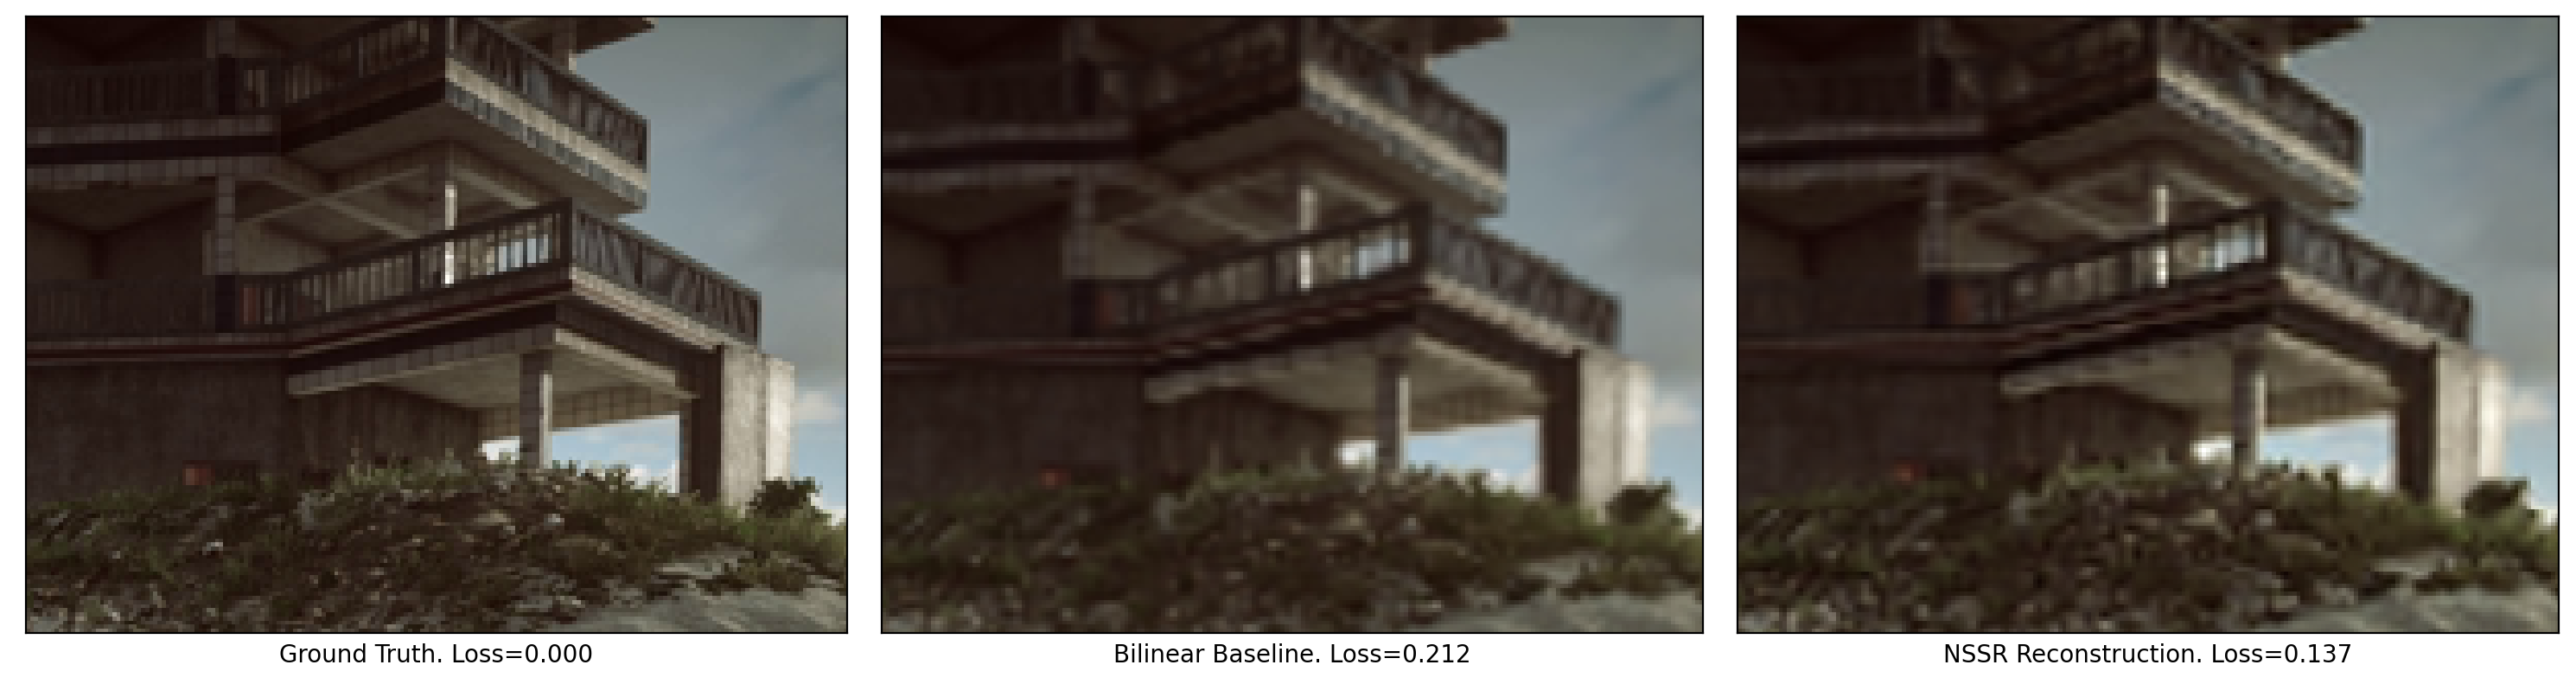

In [70]:
fig = plt.figure(figsize=(15, 8), dpi=200)

#########################
plt.subplot(131)
#plt.axis('off')
plt.imshow(roi(ref), interpolation='none')
plt.xlabel('Ground Truth. Loss=0.000')

#########################
plt.subplot(132)
plt.imshow(roi(bilin), interpolation='none')
#plt.axis('off')
plt.xlabel('Bilinear Baseline. Loss=' + str(round(loss.total_loss(to_torch(bilin), to_torch(ref)).item(), 3)))

#######################
plt.subplot(133)
plt.imshow(roi(res), interpolation='none')
#plt.axis('off')
plt.xlabel('NSSR Reconstruction. Loss=' + str(round(loss.total_loss(to_torch(res), to_torch(ref)).item(), 3)))

for ax in fig.axes:
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])

plt.tight_layout()
plt.savefig('out.png', bbox_inches='tight', pad_inches=0)